## 1) Libraries Installation
##### The cell below is to help you keep track the libraries used and install them quickly.
##### Ensure the correct library names are used, and follow the syntax: **%pip install PACKAGE_NAME**.

In [783]:
%pip install pandas
%pip install matplotlib
%pip install arch 
%pip install scikit-learn

# add commented pip installation lines for packages used as shown above for ease of testing
# the line should follow the format %pip install PACKAGE_NAME

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [784]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2) Main Section for Code
### **ALL code for machine learning and dataset analysis** should be entered below.
##### Ensure that your code is clear and readable.
##### Remember to include comments and markdown notes as necessary to explain and highlight important segments of your code.

### Data Manipulation

In [785]:
## libraries 
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
from pmdarima import auto_arima
import matplotlib.dates as mdates


#### Cleaning and transformation

In [786]:
# load data
quar_df = pd.read_csv('Quarterly Data.csv', skiprows = [1,2], index_col= [0])
quar_df.columns = [c.upper() for c in quar_df.columns]
quar_df.head()



,GDPC1,PCECC96,PCDGX,PCESVX,PCNDX,GPDIC1,FPIX,Y033RC1Q027SBEAX,PNFIX,PRFIX,...,TNWMVBSNNCBBDIX,TLBSNNBX,TLBSNNBBDIX,TABSNNBX,TNWBSNNBX,TNWBSNNBBDIX,CNCFX,S&P 500,S&P DIV YIELD,S&P PE RATIO
sasdate,,,,,,,,,,,,,,,,,,,,,
3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,282.9707,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,292.8479,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,287.3778,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544
12/1/1959,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,279.2502,...,1165.65,349400.81,254967.79,2429055.21,2079.05,1517.14,137.0372,57.7633,3.1572,17.8221
3/1/1960,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,287.8417,...,1327.63,362821.95,278692.55,2451394.44,2087.97,1603.82,130.1872,56.2767,3.3850,16.8284


## Transformation 

In [ ]:
 # transformation function
def apply_transformation(series, tcode):
    if tcode == 1:
        return series
    elif tcode == 2:
        return series.diff()
    elif tcode == 3:
        return series.diff().diff()
    elif tcode == 4:
        return np.log(series)
    elif tcode == 5:
        return np.log(series).diff()
    elif tcode == 6:
        return np.log(series).diff().diff()
    elif tcode == 7:
        return series.pct_change()
    else:
        raise ValueError(f"Unknown TCODE: {tcode}")

tcodes = pd.read_csv("Quarterly Data.csv", skiprows= [1], nrows=1, index_col= 0)
tcodes.columns = [c.upper() for c in tcodes.columns]

# transform the time series
quar_df_t = quar_df.apply(lambda x: apply_transformation(x, tcodes[x.name].item()))
quar_df_t.head()







,GDPC1,PCECC96,PCDGX,PCESVX,PCNDX,GPDIC1,FPIX,Y033RC1Q027SBEAX,PNFIX,PRFIX,...,TNWMVBSNNCBBDIX,TLBSNNBX,TLBSNNBBDIX,TABSNNBX,TNWBSNNBX,TNWBSNNBBDIX,CNCFX,S&P 500,S&P DIV YIELD,S&P PE RATIO
sasdate,,,,,,,,,,,,,,,,,,,,,
3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,282.9707,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,292.8479,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,287.3778,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544
12/1/1959,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,279.2502,...,1165.65,349400.81,254967.79,2429055.21,2079.05,1517.14,137.0372,57.7633,3.1572,17.8221
3/1/1960,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,287.8417,...,1327.63,362821.95,278692.55,2451394.44,2087.97,1603.82,130.1872,56.2767,3.3850,16.8284


We chose to use only consider variables included in Stock and Watson's factor consideration as these were proven to have predictive power for economies. Moreover, doing so eliminates almost half of all variables, making further computation and processing easier.

Source: https://www.princeton.edu/~mwatson/papers/Stock_Watson_HOM_Vol2.pdf

In [788]:
# highlight non-SW factors 
factors = pd.read_csv("Quarterly Data.csv", nrows=1, index_col= 0)
factors.columns = [c.upper() for c in factors.columns]
columns_to_drop = factors.columns[factors.iloc[0] == 0]
GDPC1 = quar_df_t["GDPC1"] # factor removes this, so need to add back later

In [789]:
quar_df_t= quar_df_t.drop(columns=columns_to_drop)
quar_df_t.insert(loc = 0, column = "GDPC1", value = GDPC1) # since target variable is removed by the factor

# process dates, converting to time series as index by quarters
quar_df_filter = quar_df_t.loc[pd.notna(quar_df_t.index), :]
quar_df_filter.index = pd.date_range(start="1959-01-01", freq="Q", periods=len(quar_df_filter))
quar_df_filter.index = quar_df_filter.index.to_period("Q") # converting to period indexed by quarters

quar_df_filter.columns

Index(['GDPC1', 'PCDGX', 'PCESVX', 'PCNDX', 'Y033RC1Q027SBEAX', 'PNFIX',
       'PRFIX', 'A014RE1Q156NBEA', 'A823RL1Q225SBEA', 'FGRECPTX',
       ...
       'SPCS20RSA', 'TWEXAFEGSMTHX', 'EXUSEU', 'EXSZUSX', 'EXJPUSX', 'EXUSUKX',
       'EXCAUSX', 'UMCSENTX', 'USEPUINDXM', 'S&P 500'],
      dtype='object', length=126)

To handle NA data, we keep columns with at least 75% of available data, and impute the rest of the data that is missing or that was introduced by the differencing.

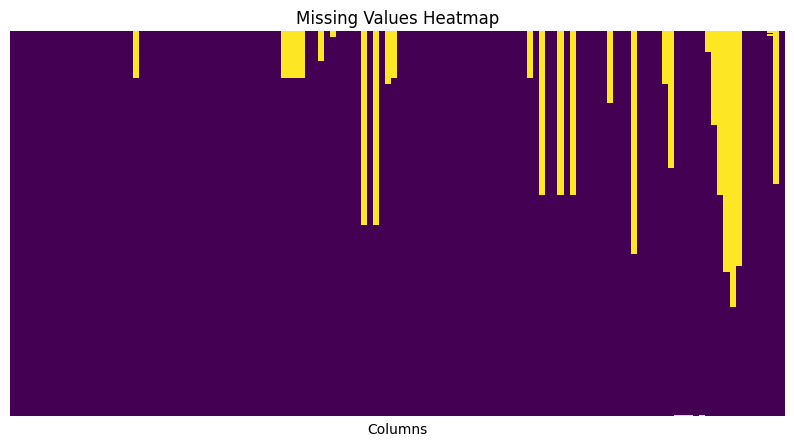

In [790]:
# heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(quar_df_filter.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap")
plt.show()

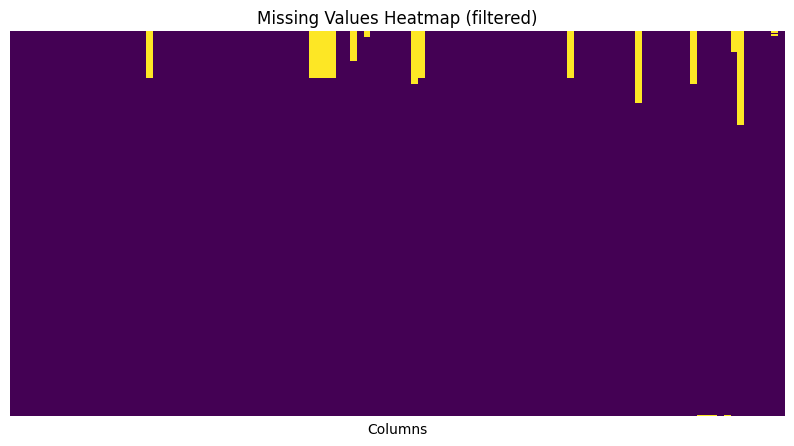

In [791]:
# filter out variables with less than 75% complete data
non_missing_ratio = quar_df_filter.notnull().mean()
threshold = 0.75  # minimum ratio of data present
valid_columns = non_missing_ratio[non_missing_ratio >= threshold].index
quar_df_filter_filtered_vars = quar_df_filter[valid_columns]

plt.figure(figsize=(10, 5))
sns.heatmap(quar_df_filter_filtered_vars.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap (filtered)")
plt.show()



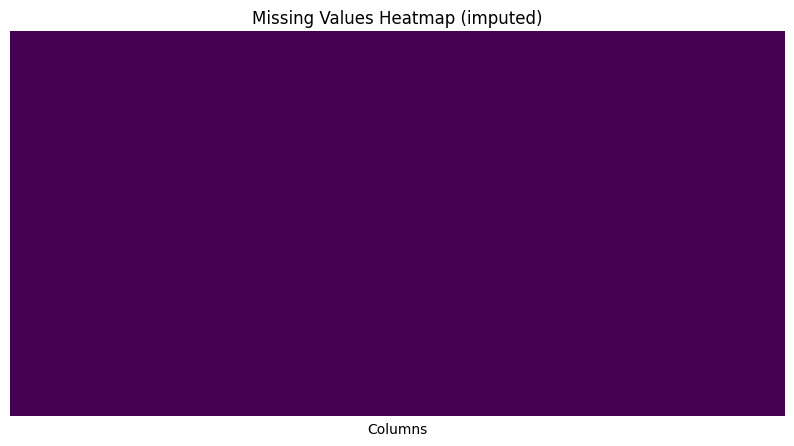

In [792]:
# impute missing values using forward then backward fill
quar_final = quar_df_filter_filtered_vars.fillna(method='ffill').fillna(method='bfill')

plt.figure(figsize=(10, 5))
sns.heatmap(quar_final.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap (imputed)")
plt.show()


In [793]:
quar_final.head()

,GDPC1,PCDGX,PCESVX,PCNDX,Y033RC1Q027SBEAX,PNFIX,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,FGRECPTX,...,HNOREMQ027SX,TFAABSHNOX,VIXCLSX,USSTHPI,EXSZUSX,EXJPUSX,EXUSUKX,EXCAUSX,UMCSENTX,S&P 500
1959Q1,3352.129,68.6651,1374.1739,689.1172,47.8021,171.0783,282.9707,0.8,-7.7,556.0802,...,3181940.06,9371.98,17.8889,228.01,4.3161,359.8417,2.8095,0.9706,95.3,55.5167
1959Q2,3427.667,71.2495,1394.7096,694.8197,49.2332,176.0004,292.8479,1.4,7.6,578.9494,...,3231997.69,9465.92,17.8889,228.01,4.3190,359.8417,2.8145,0.9619,95.3,57.5067
1959Q3,3430.057,72.6270,1413.6627,697.4699,50.8372,180.7406,287.3778,0.1,5.5,564.7381,...,3270908.16,9457.32,17.8889,228.01,4.3164,359.9281,2.8083,0.9545,95.3,58.7300
1959Q4,3439.832,69.1573,1430.8157,701.7617,50.7342,180.2333,279.2502,0.8,-3.9,566.5192,...,3302374.47,9604.03,17.8889,228.01,4.3344,360.2305,2.8025,0.9498,93.8,57.7633
1960Q1,3517.181,71.3815,1443.7405,703.5338,52.4985,186.4967,287.8417,2.1,-14.2,618.3418,...,3374113.12,9540.49,17.8889,228.01,4.3338,360.5337,2.8030,0.9520,100.0,56.2767


#### INTERPOLATING THE 2020Q1 to 2021Q1 data

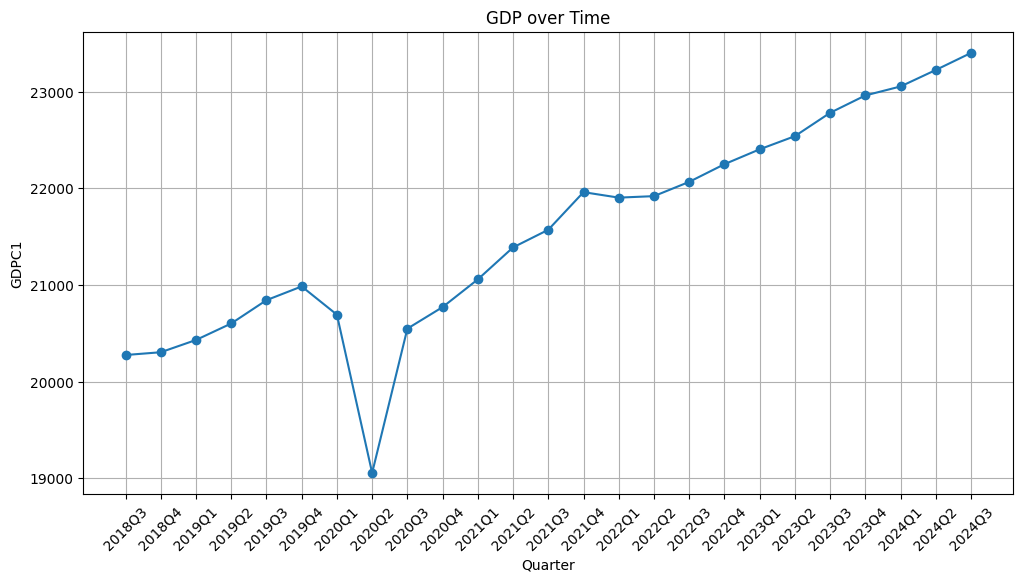

In [794]:
import matplotlib.pyplot as plt
quar_final_new= quar_final.tail(25)
# Plot GDPC1 from quar_final
plt.figure(figsize=(12, 6))
plt.plot(quar_final_new.index.astype(str), quar_final_new['GDPC1'], marker='o', linestyle='-')
plt.xlabel('Quarter')
plt.ylabel('GDPC1')
plt.title('GDP over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [795]:
quar_final.loc['2020Q3':"2020Q3",:]

,GDPC1,PCDGX,PCESVX,PCNDX,Y033RC1Q027SBEAX,PNFIX,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,FGRECPTX,...,HNOREMQ027SX,TFAABSHNOX,VIXCLSX,USSTHPI,EXSZUSX,EXJPUSX,EXUSUKX,EXCAUSX,UMCSENTX,S&P 500
2020Q3,20548.793,1807.0342,8910.3502,3127.994,1126.3183,2796.8112,840.2066,0.5,-12.1,3598.4797,...,33948399.36,93189.9,25.7437,439.41,0.9192,106.0946,1.293,1.3319,75.7,3321.6167


In [840]:
quar_final.loc['2020Q3':"2020Q3",:]=np.nan


# Convert PeriodIndex to DatetimeIndex
quar_final.index = quar_final.index.to_timestamp()

# Perform polynomial interpolation
quar_final = quar_final.interpolate(method='polynomial', order=2)

# (Optional) Convert back to PeriodIndex if needed
quar_final.index = quar_final.index.to_period('Q')


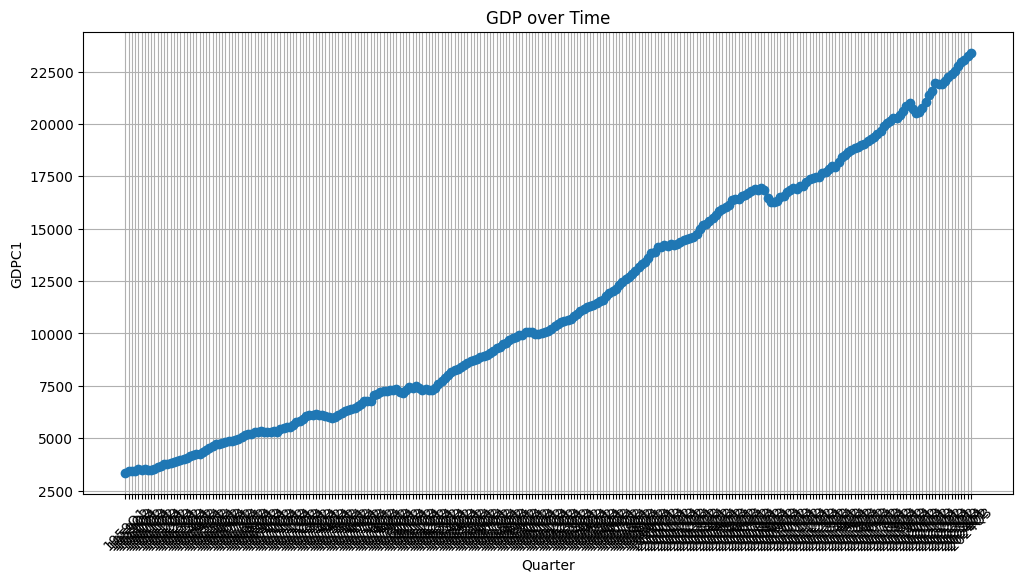

In [841]:
import matplotlib.pyplot as plt

# Plot GDPC1
plt.figure(figsize=(12, 6))
plt.plot(quar_final.index.astype(str), quar_final['GDPC1'], marker='o', linestyle='-')
plt.xlabel('Quarter')
plt.ylabel('GDPC1')
plt.title('GDP over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Feature Selection

In [798]:
# check that impt variables are still in the dataset 
best = ["LNS14000025", "DMANEMP", "LNS13023621", "USTPU", "IPBUSEQ"]

for i in best:
    print(i in quar_final)

True
True
True
True
True


As mentioned in the report, we identified 5 features that we found were the most significant, and isolate them before building a correlation matrix to choose the rest of the variables 

In [799]:
# remove impt from df before building correlation mat
impt_df =  pd.concat([quar_final.pop(x) for x in best], axis = 1)
impt_df.head()

,LNS14000025,DMANEMP,LNS13023621,USTPU,IPBUSEQ
1959Q1,5.1333,8848.0000,1187.3333,10821.0000,8.1551
1959Q2,4.2000,9148.6667,1187.3333,10940.6667,8.7169
1959Q3,4.4667,8988.3333,1187.3333,10990.6667,8.8899
1959Q4,4.8000,8971.3333,1187.3333,11025.3333,8.7005
1960Q1,4.3667,9316.0000,1187.3333,11114.0000,9.1087


In [800]:
quar_final.head()

,GDPC1,PCDGX,PCESVX,PCNDX,Y033RC1Q027SBEAX,PNFIX,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,FGRECPTX,...,HNOREMQ027SX,TFAABSHNOX,VIXCLSX,USSTHPI,EXSZUSX,EXJPUSX,EXUSUKX,EXCAUSX,UMCSENTX,S&P 500
1959Q1,3352.129,68.6651,1374.1739,689.1172,47.8021,171.0783,282.9707,0.8,-7.7,556.0802,...,3181940.06,9371.98,17.8889,228.01,4.3161,359.8417,2.8095,0.9706,95.3,55.5167
1959Q2,3427.667,71.2495,1394.7096,694.8197,49.2332,176.0004,292.8479,1.4,7.6,578.9494,...,3231997.69,9465.92,17.8889,228.01,4.3190,359.8417,2.8145,0.9619,95.3,57.5067
1959Q3,3430.057,72.6270,1413.6627,697.4699,50.8372,180.7406,287.3778,0.1,5.5,564.7381,...,3270908.16,9457.32,17.8889,228.01,4.3164,359.9281,2.8083,0.9545,95.3,58.7300
1959Q4,3439.832,69.1573,1430.8157,701.7617,50.7342,180.2333,279.2502,0.8,-3.9,566.5192,...,3302374.47,9604.03,17.8889,228.01,4.3344,360.2305,2.8025,0.9498,93.8,57.7633
1960Q1,3517.181,71.3815,1443.7405,703.5338,52.4985,186.4967,287.8417,2.1,-14.2,618.3418,...,3374113.12,9540.49,17.8889,228.01,4.3338,360.5337,2.8030,0.9520,100.0,56.2767


In [801]:
corr_matrix = quar_final.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

to_drop


['PCDGX',
 'PCESVX',
 'PCNDX',
 'Y033RC1Q027SBEAX',
 'PNFIX',
 'FGRECPTX',
 'SLCEX',
 'EXPGSC1',
 'IMPGSC1',
 'IPDMAT',
 'IPNMAT',
 'IPDCONGD',
 'IPB51110SQ',
 'IPNCONGD',
 'IPB51220SQ',
 'CUMFNS',
 'USCONS',
 'USEHS',
 'USFIRE',
 'USINFO',
 'USPBS',
 'USLAH',
 'USSERV',
 'USTRADE',
 'USWTRADE',
 'CES9092000001',
 'CES9093000001',
 'LNS14000026',
 'UEMP15T26',
 'UEMP27OV',
 'LNS13023557',
 'LNS12032194',
 'AWHNONAG',
 'HOUSTS',
 'HOUSTW',
 'AMDMNOX',
 'AMDMUOX',
 'ANDENOX',
 'INVCQRMTSPL',
 'GPDICTPI',
 'IPDBS',
 'DMOTRG3Q086SBEA',
 'DFDHRG3Q086SBEA',
 'DREQRG3Q086SBEA',
 'DODGRG3Q086SBEA',
 'DFXARG3Q086SBEA',
 'DCLORG3Q086SBEA',
 'DGOERG3Q086SBEA',
 'DONGRG3Q086SBEA',
 'DHUTRG3Q086SBEA',
 'DHLCRG3Q086SBEA',
 'DTRSRG3Q086SBEA',
 'DRCARG3Q086SBEA',
 'DFSARG3Q086SBEA',
 'DIFSRG3Q086SBEA',
 'DOTSRG3Q086SBEA',
 'WPSFD49502',
 'WPSFD4111',
 'PPIIDC',
 'WPSID61',
 'COMPRNFB',
 'RCPHBS',
 'OPHNFB',
 'ULCNFB',
 'UNLPNBS',
 'TB3MS',
 'BAA10YM',
 'BUSLOANSX',
 'CONSUMERX',
 'NONREVSLX',
 'REALLN

In [802]:
# drop variables specified by correlation matrix
quar_final = quar_final.drop(to_drop, axis = 1)

# add impt var back 
quar_df_total= quar_final.merge(impt_df,how= "left", left_index=True, right_index=True)
quar_df_total.head()

,GDPC1,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,TCU,USMINE,CES9091000001,LNS14000012,UEMPLT5,UEMP5TO14,...,GS1TB3MX,GS10TB3MX,VIXCLSX,EXCAUSX,UMCSENTX,LNS14000025,DMANEMP,LNS13023621,USTPU,IPBUSEQ
1959Q1,3352.129,282.9707,0.8,-7.7,88.1496,799.0000,2337.0000,13.5000,1529.0000,1142.0000,...,0.73,1.22,17.8889,0.9706,95.3,5.1333,8848.0000,1187.3333,10821.0000,8.1551
1959Q2,3427.667,292.8479,1.4,7.6,88.1496,803.6667,2331.6667,14.4000,1498.3333,967.3333,...,0.92,1.26,17.8889,0.9619,95.3,4.2000,9148.6667,1187.3333,10940.6667,8.7169
1959Q3,3430.057,287.3778,0.1,5.5,88.1496,776.0000,2331.6667,15.1667,1600.0000,1145.0000,...,1.06,0.96,17.8889,0.9545,95.3,4.4667,8988.3333,1187.3333,10990.6667,8.8899
1959Q4,3439.832,279.2502,0.8,-3.9,88.1496,776.0000,2367.3333,15.4000,1717.3333,1206.3333,...,0.69,0.35,17.8889,0.9498,93.8,4.8000,8971.3333,1187.3333,11025.3333,8.7005
1960Q1,3517.181,287.8417,2.1,-14.2,88.1496,785.0000,2396.6667,14.4333,1578.3333,1066.3333,...,0.70,0.61,17.8889,0.9520,100.0,4.3667,9316.0000,1187.3333,11114.0000,9.1087


In [803]:
#checking for NAN in join
quar_df_total.isna().sum().sum()

0

Training data and test data split

In [804]:
train_size = int(len(quar_df_total) * 0.7) #test-split of 0.7
quar_df_train = quar_df_total[:train_size]
quar_df_test = quar_df_total[train_size:]


### Modeling

#### ARIMA

In [842]:
# find optimal ARIMA parameters
optimal_model = auto_arima(quar_df_train['GDPC1'],
                         start_p=0, start_q=0, max_p=5, max_q=5,
                         seasonal=False,
                         d=None, max_d=1,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(f"Optimal ARIMA parameters: {optimal_model.order}")


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2062.276, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2038.384, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2047.933, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2187.970, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2029.101, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2031.071, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2030.777, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2030.982, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2033.054, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2047.832, Time=0.07 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.235 seconds
Optimal ARIMA parameters: (2, 1, 0)


In [806]:
# fit model
arima_model = ARIMA(quar_df_train['GDPC1'], order=optimal_model.order)
arima_results = arima_model.fit()


#### VAR

In [807]:
#fit the vector autoregression model
var_model = VAR(quar_df_train)
var_results = var_model.fit()

### Evaluation

#### Model Evaluation

In [808]:
# to calculate whether GDP moves in the same direction as that in the actual data
def calculate_directional_accuracy(actual, predicted):
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    
    correct_directions = np.sum(actual_direction == predicted_direction)
    total_directions = len(actual_direction)
    accuracy = correct_directions / total_directions
    
    metrics = {
        'accuracy': accuracy,
        'correct_predictions': correct_directions,
        'total_predictions': total_directions
    }
    
    return metrics


##### Model Evaluation of ARIMA

In [809]:
# seeing whether the change in GDP as predicted by ARIMA is the same as that in the test data
arima_forecast = arima_results.forecast(len(quar_df_test))
arima_accuracy = calculate_directional_accuracy(quar_df_test['GDPC1'], arima_forecast)
print("\nARIMA Directional Accuracy:", arima_accuracy)



ARIMA Directional Accuracy: {'accuracy': 0.8589743589743589, 'correct_predictions': 67, 'total_predictions': 78}


##### Model Evaluation of VAR

In [810]:
# seeing whether the change in GDP as predicted by VAR is the same as that in the test data
var_forecast = var_results.forecast(steps=len(quar_df_test), y = quar_df_train.values)
var_gdp_forecast = var_forecast[:, quar_df_total.columns.get_loc('GDPC1')]
var_accuracy = calculate_directional_accuracy(quar_df_test['GDPC1'], var_gdp_forecast)
print("\nVAR Directional Accuracy:", var_accuracy)



VAR Directional Accuracy: {'accuracy': 0.3076923076923077, 'correct_predictions': 24, 'total_predictions': 78}


### Fan Charts

In [811]:
n_forecasts = 5 # 2024 Q4 to 2025 Q4
n_simulations = 1000 
intervals = [0.50, 0.65, 0.80]


In [812]:
def generate_fan_chart(forecasts, intervals, title, arima=False):
    """Generate fan chart with multiple confidence intervals"""
    plt.figure(figsize=(12, 6))
    plt.plot(forecasts.mean(axis=1), color='blue', label='Mean Forecast')
    
    colors = ['lightblue', 'skyblue', 'cornflowerblue']
    for interval, color in zip(intervals, colors):
        lower = np.percentile(forecasts, (100 - interval * 100) / 2, axis=1)
        upper = np.percentile(forecasts, 100 - (100 - interval * 100) / 2, axis=1)
        plt.fill_between(range(len(forecasts)), lower, upper, color=color, alpha=0.3,
                        label=f'{interval*100}% CI')

    quarters = ["2024Q4", '2025Q1', '2025Q2', '2025Q3', '2025Q4']

    
    plt.xticks(ticks=range(len(quarters)), labels=quarters)
    plt.yticks([])

    plt.title(title)
    plt.legend()
    plt.grid(True)
    if arima==True:
        plt.ylim((0.005, 0.01))

    return plt


#### ARIMA Fan Chart

In [813]:
#optimal_model.order contains (p, d, q) which are the parameters for AR, differencing, and MA components
#obtained from the model with the lowest AIC
arima_model = ARIMA(quar_df_total['GDPC1'], order=optimal_model.order)
arima_results = arima_model.fit()



In [814]:
arima_forecasts = np.zeros((n_forecasts, n_simulations)) # simulating the next 5 quarters
for i in range(n_simulations):
    arima_forecasts[:, i] = arima_results.simulate(n_forecasts) # appending each result to arima_forecasts


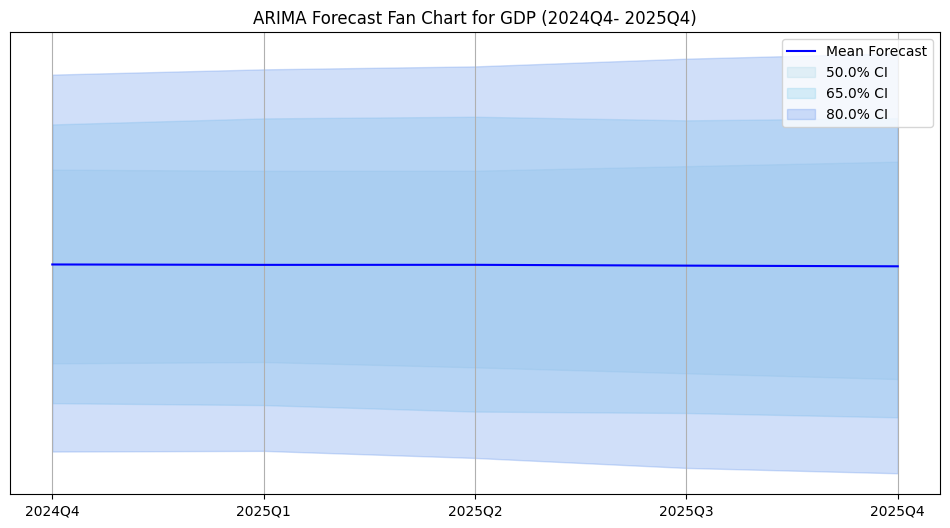

In [815]:
arima_fan = generate_fan_chart(
    pd.DataFrame(arima_forecasts), 
    intervals, 
    'ARIMA Forecast Fan Chart for GDP (2024Q4- 2025Q4)'
    
)# plotting the predictions for the next 5 quarters with the confidence intervals
arima_fan.show()

#### VAR Fan Chart

In [816]:
var_model = VAR(quar_df_total) 
var_results = var_model.fit()

In [817]:
var_forecasts = np.zeros((n_forecasts, n_simulations))
for i in range(n_simulations):
    var_sim = var_results.simulate_var(n_forecasts)
    var_forecasts[:, i] = var_sim[:, quar_df_total.columns.get_loc('GDPC1')]


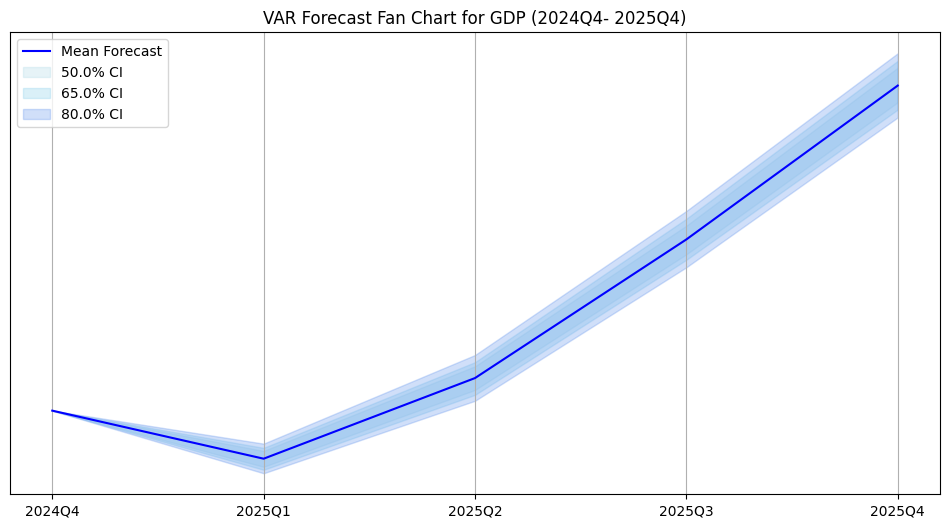

In [818]:
var_fan = generate_fan_chart(
    pd.DataFrame(var_forecasts), 
    intervals, 
    'VAR Forecast Fan Chart for GDP (2024Q4- 2025Q4)'
)
var_fan.show()


### Print forecast summaries

In [819]:
print("\nARIMA Forecasts (Mean):")
print("Q1 2025:", np.mean(arima_forecasts[1]))
print("Q3 2025:", np.mean(arima_forecasts[3]))
print("Q4 2025:", np.mean(arima_forecasts[4]))

print("\nVAR Forecasts (Mean):")
print("Q1 2025:", np.mean(var_forecasts[1]))
print("Q3 2025:", np.mean(var_forecasts[3]))
print("Q4 2025:", np.mean(var_forecasts[4]))



ARIMA Forecasts (Mean):
Q1 2025: 21.126112035141617
Q3 2025: 15.928912884664053
Q4 2025: 11.321305203520991

VAR Forecasts (Mean):
Q1 2025: -2019.7203506307435
Q3 2025: -660.7067305785429
Q4 2025: 292.8496907486999


# ARDL MODEL

In [820]:
from statsmodels.datasets.danish_data import load
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order

## Selecting order for ARDL

In [821]:
quar_df_train

,GDPC1,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,TCU,USMINE,CES9091000001,LNS14000012,UEMPLT5,UEMP5TO14,...,GS1TB3MX,GS10TB3MX,VIXCLSX,EXCAUSX,UMCSENTX,LNS14000025,DMANEMP,LNS13023621,USTPU,IPBUSEQ
1959Q1,3352.129,282.9707,0.8,-7.7,88.1496,799.0000,2337.0000,13.5000,1529.0000,1142.0000,...,0.73,1.22,17.8889,0.9706,95.3,5.1333,8848.0000,1187.3333,10821.0000,8.1551
1959Q2,3427.667,292.8479,1.4,7.6,88.1496,803.6667,2331.6667,14.4000,1498.3333,967.3333,...,0.92,1.26,17.8889,0.9619,95.3,4.2000,9148.6667,1187.3333,10940.6667,8.7169
1959Q3,3430.057,287.3778,0.1,5.5,88.1496,776.0000,2331.6667,15.1667,1600.0000,1145.0000,...,1.06,0.96,17.8889,0.9545,95.3,4.4667,8988.3333,1187.3333,10990.6667,8.8899
1959Q4,3439.832,279.2502,0.8,-3.9,88.1496,776.0000,2367.3333,15.4000,1717.3333,1206.3333,...,0.69,0.35,17.8889,0.9498,93.8,4.8000,8971.3333,1187.3333,11025.3333,8.7005
1960Q1,3517.181,287.8417,2.1,-14.2,88.1496,785.0000,2396.6667,14.4333,1578.3333,1066.3333,...,0.70,0.61,17.8889,0.9520,100.0,4.3667,9316.0000,1187.3333,11114.0000,9.1087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003Q4,15162.760,982.9726,0.3,7.6,76.8539,574.6667,2736.6667,16.3667,2640.0000,2519.0000,...,0.38,3.37,17.7991,1.3160,92.0,5.4667,8857.6667,4669.3333,25196.6667,76.8365
2004Q1,15248.680,994.4336,0.4,4.4,77.4360,579.0000,2731.3333,16.7667,2582.3333,2413.0000,...,0.31,3.10,16.5098,1.3181,98.0,5.1667,8867.3333,4407.0000,25301.0000,77.9788
2004Q2,15366.850,1025.9823,0.6,2.4,77.9207,589.6667,2737.6667,16.9000,2726.6667,2388.3333,...,0.70,3.52,16.3226,1.3596,93.3,5.1333,8919.3333,4210.3333,25418.0000,78.8259
2004Q3,15512.619,1033.3031,0.5,4.5,78.3778,595.3333,2729.0000,17.0333,2746.0000,2407.6667,...,0.59,2.82,15.3968,1.3078,95.6,5.0000,8951.6667,4081.3333,25480.3333,80.4802


In [822]:
best # refer to earlier section

['LNS14000025', 'DMANEMP', 'LNS13023621', 'USTPU', 'IPBUSEQ']

## Trying to reduce runtime by getting the most correlated features

In [823]:
import pandas as pd

def top_correlated(df, target_col="GDPC1", top_n=5):
    if target_col not in df.columns:
        raise ValueError(f"Column '{target_col}' not found in DataFrame")
    
    correlations = df.corr()['GDPC1'].drop('GDPC1')

    # Sort by absolute correlation value in descending order
    top_correlations = correlations.abs().sort_values(ascending=False)

    filtered_top_correlations=[]
    for i in top_correlations.index:
        if len(filtered_top_correlations) >= 5:
            break
        if i not in best:
            filtered_top_correlations.append(i)

    quar_df_top_corr=df[filtered_top_correlations+best+['GDPC1']]
    return quar_df_top_corr

## change cutoff to vary runtime

In [824]:
cutoff=71
quar_df_train_top_corr = top_correlated(quar_df_train)
smaller_quar_df_train= quar_df_train_top_corr[-cutoff:] #to reduce runtime
endo = smaller_quar_df_train['GDPC1']
exog=smaller_quar_df_train.drop(columns=['GDPC1'])

In [825]:
exog.columns

Index(['PRFIX', 'EXCAUSX', 'AWOTMAN', 'WPU0531', 'LNS13023705', 'LNS14000025',
       'DMANEMP', 'LNS13023621', 'USTPU', 'IPBUSEQ'],
      dtype='object')

syntax for ardl_select_order:

https://www.statsmodels.org/devel/examples/notebooks/generated/autoregressive_distributed_lag.html

- endo = dependent variable (the column you want to predict)
- exog= independent variable
- maxorder= maximum number of lags to be used by the model ON EVERY INDEPENDENT VARIABLE
- maxlag= maximum number of lags to be used by the model ON DEPENDENT VARIABLE (eg max lag1 means will kinda create a new column lagging by one period, then see whether the changes in that column affects GDPC1)
- IC= just the error , input bic or aic
- trend=c means include constant when you form the linear equation(??); the a in the y=a+bx 
- seasonal =False because the arima model was also set to false

## Trying out different parameters: Lagging by 5, max order =2 with ic= AIC
- maxlag=5 now, meaning the model can go up to maximum of 5 lags on each variable, BUT THE RUNTIME IS VERY LONG

In [826]:
maxlag=5
maxorder=1

#prev 5,1

In [827]:

sel_res_aic_lag5= ardl_select_order(endo,
                           exog=exog,
                           maxlag=maxlag,
                           maxorder=maxorder,
                          ic='aic',
                          trend='c',
                          seasonal=False,)
res_aic_lag5= sel_res_aic_lag5.model.fit()
res_aic_lag5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARDL Model Results                                 
=====================================================================================
Dep. Variable:                         GDPC1   No. Observations:                   71
Model:             ARDL(4, 0, 0, 0, 1, 1, 1)   Log Likelihood                -319.420
Method:                      Conditional MLE   S.D. of innovations             28.461
Date:                       Sun, 23 Feb 2025   AIC                            668.840
Time:                               03:10:50   BIC                            701.910
Sample:                           06-30-1988   HQIC                           681.926
                                - 12-31-2004                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3175.2605    790.939     -4.015      0.000   -4761.683   -1588.838
GDPC1.L1           0.3571      0.096      3.716      0.000       0.164       0.550
GDPC1.L2           0.2849      0.103      2.777      0.008       0.079       0.491
GDPC1.L3          -0.1117      0.104     -1.072      0.288      -0.320       0.097
GDPC1.L4           0.1572      0.078      2.006      0.050    -1.6e-06       0.314
PRFIX.L0           1.8926      0.209      9.046      0.000       1.473       2.312
EXCAUSX.L0      -198.5340     80.073     -2.479      0.016    -359.140     -37.928
WPU0531.L0        -0.1920      0.113     -1.697      0.096      -0.419       0.035
LNS14000025.L0   -23.0604     30.631     -0.753      0.455     -84.498      38.377
LNS14000025.L1   134.4971     30.208      4.452      0.000      73.908     195.087
USTPU.L0           0.0556      0.089      0.626      0.534      -0.123       0.234
USTPU.L1           0.1530      0.087      1.756      0.085      -0.022       0.328
IPBUSEQ.L0        21.3453      5.838      3.656      0.001       9.635      33.055
IPBUSEQ.L1       -13.0427      5.623     -2.320      0.024     -24.320      -1.765
==================================================================================
"""

In [828]:
df_res_aic_lag_5= pd.DataFrame({"Coeff":res_aic_lag5.params, "P-value":res_aic_lag5.pvalues}).sort_values(by="P-value")
df_res_aic_lag_5

,Coeff,P-value
PRFIX.L0,1.892644,2.483292e-12
LNS14000025.L1,134.497063,4.408814e-05
const,-3175.260535,1.884923e-04
GDPC1.L1,0.357145,4.889549e-04
IPBUSEQ.L0,21.345311,5.890015e-04
GDPC1.L2,0.284941,7.576830e-03
EXCAUSX.L0,-198.534029,1.637407e-02
IPBUSEQ.L1,-13.042718,2.424180e-02
GDPC1.L4,0.157248,5.000226e-02
USTPU.L1,0.153028,8.488489e-02


I guess we can remove anything below const, since these variables cant do any better than just simply equating GDPC1 to the constant ????

In [829]:

ardl_forecasts_lag_5= res_aic_lag5.forecast(steps=cutoff, exog=exog[-cutoff:])
ardl_forecasts_lag_5

2005Q1    13674.799957
2005Q2    13067.914234
2005Q3    12311.291357
2005Q4    12101.893727
2006Q1    11623.324054
              ...     
2021Q3    15124.785217
2021Q4    15252.057822
2022Q1    15369.216652
2022Q2    15531.295408
2022Q3    15668.755542
Freq: Q-DEC, Length: 71, dtype: float64

In [830]:
sliced_ardl_test_set= quar_df_test['GDPC1'][:cutoff]

In [831]:
# to calculate whether GDP moves in the same direction as that in the actual data
def calculate_directional_accuracy(actual, predicted):
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    
    correct_directions = np.sum(actual_direction == predicted_direction)
    total_directions = len(actual_direction)
    accuracy = correct_directions / total_directions
    
    metrics = {
        'accuracy': accuracy,
        'correct_predictions': correct_directions,
        'total_predictions': total_directions
    }
    
    return metrics


ardl_accuracy = calculate_directional_accuracy(sliced_ardl_test_set, ardl_forecasts_lag_5)
print("\nARDL Directional Accuracy:", ardl_accuracy)


ARDL Directional Accuracy: {'accuracy': 0.7, 'correct_predictions': 49, 'total_predictions': 70}


## PREDICTING 2025
- refitting the entire model (???)

In [832]:
cutoff=71
quar_df_total_top_corr = top_correlated(quar_df_total)
smaller_quar_df_train= quar_df_total_top_corr[-cutoff:] #to reduce runtime
pred_2025_endo = smaller_quar_df_train['GDPC1']
pred_2025_exog=smaller_quar_df_train.drop(columns=['GDPC1'])


In [833]:
pred_2025_exog.columns

Index(['PRFIX', 'HOUSTNE', 'TCU', 'AWOTMAN', 'HOUSTMW', 'LNS14000025',
       'DMANEMP', 'LNS13023621', 'USTPU', 'IPBUSEQ'],
      dtype='object')

In [834]:
pred_2025_sel_res_aic_lag5= ardl_select_order(pred_2025_endo,
                           exog=pred_2025_exog,
                           maxlag=maxlag,
                           maxorder=maxorder,
                          ic='aic',
                          trend='c',
                          seasonal=True)
pred_2025_res_aic_lag5= pred_2025_sel_res_aic_lag5.model.fit()
pred_2025_res_aic_lag5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARDL Model Results                                 
=====================================================================================
Dep. Variable:                         GDPC1   No. Observations:                   71
Model:             Seas. ARDL(5, 0, 1, 1, 0)   Log Likelihood                -375.864
Method:                      Conditional MLE   S.D. of innovations             71.950
Date:                       Sun, 23 Feb 2025   AIC                            783.729
Time:                               03:11:32   BIC                            818.763
Sample:                           06-30-2008   HQIC                           797.573
                                - 09-30-2024                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4786.7115   1959.754     -2.443      0.018   -8721.081    -852.342
s(2,4)            74.4890     30.059      2.478      0.017      14.143     134.835
s(3,4)            77.5390     30.400      2.551      0.014      16.509     138.569
s(4,4)            72.8029     30.355      2.398      0.020      11.863     133.743
GDPC1.L1           0.8289      0.123      6.747      0.000       0.582       1.076
GDPC1.L2          -0.1646      0.166     -0.990      0.327      -0.499       0.169
GDPC1.L3           0.2424      0.172      1.412      0.164      -0.102       0.587
GDPC1.L4          -0.3135      0.162     -1.935      0.059      -0.639       0.012
GDPC1.L5           0.3816      0.104      3.670      0.001       0.173       0.590
TCU.L0            14.8665      8.543      1.740      0.088      -2.284      32.017
AWOTMAN.L0       292.5982     92.658      3.158      0.003     106.579     478.617
AWOTMAN.L1      -235.3130    104.529     -2.251      0.029    -445.163     -25.463
LNS14000025.L0   -90.1049     51.037     -1.765      0.083    -192.566      12.356
LNS14000025.L1   137.3202     38.080      3.606      0.001      60.871     213.769
USTPU.L0           0.1404      0.086      1.626      0.110      -0.033       0.314
==================================================================================
"""

In [835]:
df_pred_2025_res_aic_lag_5= pd.DataFrame({"Coeff":pred_2025_res_aic_lag5.params, "P-value":pred_2025_res_aic_lag5.pvalues}).sort_values(by="P-value")
df_pred_2025_res_aic_lag_5

,Coeff,P-value
GDPC1.L1,0.828895,1.367045e-08
GDPC1.L5,0.381566,5.808756e-04
LNS14000025.L1,137.320227,7.064625e-04
AWOTMAN.L0,292.598247,2.669801e-03
"s(3,4)",77.539017,1.379694e-02
"s(2,4)",74.488958,1.655934e-02
const,-4786.711532,1.809009e-02
"s(4,4)",72.802887,2.016293e-02
AWOTMAN.L1,-235.312971,2.871205e-02
GDPC1.L4,-0.313513,5.857075e-02


In [836]:
quarters_to_predict=5

In [ ]:
pred_2025_ardl_forecasts_lag_5= pred_2025_res_aic_lag5.forecast(steps=quarters_to_predict, exog=pred_2025_exog[-quarters_to_predict:])
pred_2025_ardl_forecasts_lag_5

2024Q4    23585.231589
2025Q1    23622.639674
2025Q2    23795.462608
2025Q3    23965.703397
2025Q4    24105.329829
Freq: Q-DEC, dtype: float64

In [838]:
def generate_fan_chart(forecasts, intervals, title, arima=False):
    """Generate fan chart with multiple confidence intervals"""
    plt.figure(figsize=(12, 6))
    plt.plot(forecasts.mean(axis=1), color='blue', label='Mean Forecast')
    
    colors = ['lightblue', 'skyblue', 'cornflowerblue']
    for interval, color in zip(intervals, colors):
        lower = np.percentile(forecasts, (100 - interval * 100) / 2, axis=1)
        upper = np.percentile(forecasts, 100 - (100 - interval * 100) / 2, axis=1)
        plt.fill_between(range(len(forecasts)), lower, upper, color=color, alpha=0.3,
                        label=f'{interval*100}% CI')

    quarters = ["2024Q4", '2025Q1', '2025Q2', '2025Q3', '2025Q4']

    
    plt.xticks(ticks=range(len(quarters)), labels=quarters)
    plt.yticks([])

    plt.title(title)
    plt.legend()
    plt.grid(True)
    if arima==True:
        plt.ylim((0.005, 0.01))

    return plt


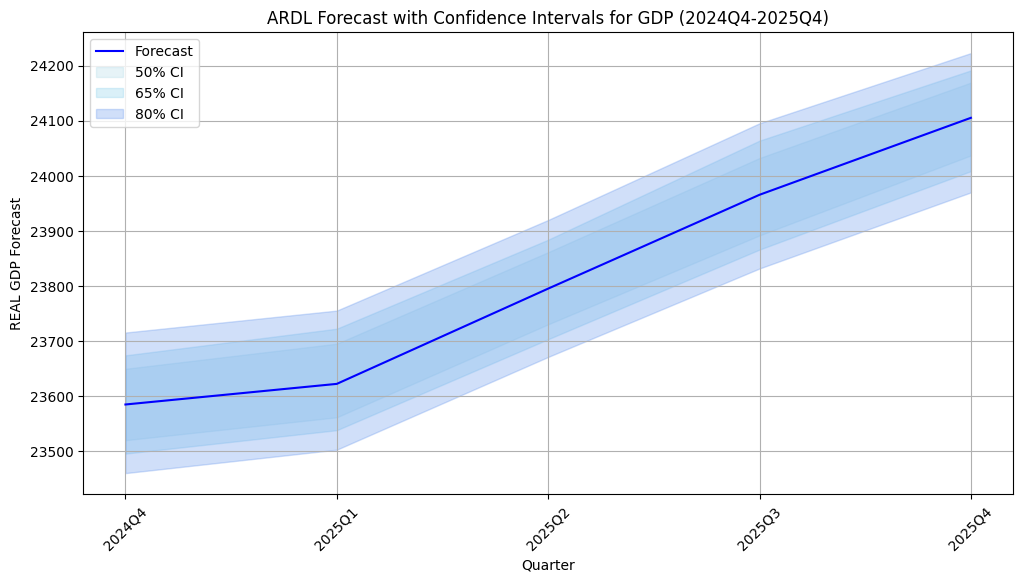

array([[23634.90300441, 23571.40515899, 23650.00044292, ...,
        23649.31587523, 23528.11369013, 23642.48986724],
       [23762.57521758, 23715.10304222, 23628.60271092, ...,
        23534.4522088 , 23606.33297753, 23548.14940944],
       [23727.94478047, 23781.0107409 , 23716.22061587, ...,
        23671.28655042, 23828.8802497 , 23779.93670309],
       [23774.92264142, 23879.66489613, 23924.34284386, ...,
        23933.67361675, 24130.04121279, 24001.76818635],
       [24018.98046859, 24102.20948019, 24107.13151629, ...,
        24416.62084919, 24186.13344803, 24020.52326928]])

In [839]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_forecast_with_intervals(forecast_series, forecast_simulations, intervals, title):
    """Plot forecast with multiple confidence intervals"""
    
    # Ensure forecast_simulations is a NumPy array
    forecast_simulations = np.asarray(forecast_simulations, dtype=float)
    
    plt.figure(figsize=(12, 6))
    plt.plot(forecast_series.index.astype(str), forecast_series.values, color='blue', label='Forecast')

    colors = ['lightblue', 'skyblue', 'cornflowerblue']
    
    for interval, color in zip(intervals, colors):
        lower = np.percentile(forecast_simulations, (100 - interval * 100) / 2, axis=1)
        upper = np.percentile(forecast_simulations, 100 - (100 - interval * 100) / 2, axis=1)
        
        plt.fill_between(forecast_series.index.astype(str), lower, upper, color=color, alpha=0.3,
                         label=f'{interval*100:.0f}% CI')

    plt.xlabel('Quarter')
    plt.ylabel('REAL GDP Forecast')
    plt.title(title)
    #plt.ylim((-0.01, 0.01))
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Example forecast data
forecast_series = pd.Series(
    pred_2025_ardl_forecasts_lag_5,
    index=pd.period_range(start="2024Q4", periods=quarters_to_predict, freq="Q")
)

# Example simulated forecasts (5 rows for each quarter, multiple simulations per quarter)
np.random.seed(42)
forecast_simulations = np.random.normal(loc=forecast_series.values[:, None], scale=100, size=(quarters_to_predict, 1000))  # 1000 simulations

# Plot the forecast with confidence intervals
plot_forecast_with_intervals(
    forecast_series,
    forecast_simulations,
    [0.50, 0.65, 0.80], 
    'ARDL Forecast with Confidence Intervals for GDP (2024Q4-2025Q4)'
)
forecast_simulations

### END OF CODE